In [1]:
# Creating a class for an array
class priority_queue_array:
    # Initialise array
    def __init__(self, length):
        self.len = length
        self.arr = [float('inf')] * length
        self.arr[0] = 0
    
    # When array is empty (where u value is infinity) return true, else return false
    def is_empty(self):
        for u in range(self.len) :
            if self.arr[u] != float('inf') :
                return False
        return True
    
    def pop(self, u):
        self.arr[u] = float('inf')
        
    def peak(self):
        minimum_value = float('inf')
        position = -1
        for u in range(self.len) :
            if self.arr[u] < minimum_value :
                minimum_value = self.arr[u]
                position = u
        return position
    
    def update(self, u, value):
        self.arr[u] = value

def dijkastraAdjacencyMatrix(V, E):
    # store the E into adjacency matrix
    edge = [[-1] * V for i in range(V)] # initialize the edge matrix where -1 denotes no edge
    for (start, end, value) in E :
        edge[start][end] = value
    
    # initialize the priority queue
    dis = [float('inf')] * V # initialize the distance array with value of infinity
    dis[0] = 0
    pq = priority_queue_array(V)
    
    while pq.is_empty() == False :
        u = pq.peak()
        pq.pop(u)
        for v in range(V) :
            if edge[u][v] != -1 and dis[v] > dis[u] + edge[u][v] :
                dis[v] = dis[u] + edge[u][v]
                pq.update(v, dis[v])
    return dis[V - 1] 

In [2]:
# Key Variables:
# graph refers to the vertex graph in the targetted adjacency matrix. We will cover, average, best and worst.
# v refers to vertex
# s refers to solution set. Vertex which has been solved will be 1. Else default is s[v] = 0.
# d refers to distance to said vertex, denoted as d[v] = infinity. Default will be infinity as we will use the minimum d[v] to solve.
# pi refers to previous node for said vertex, denoted as pi[v] = none. Deafault will be none as no previous node is solved yet.
# pq refers to priority queue, this is the array that will be used to determine the next vertex to find the shortest path

# Function will find the distance to said vertex in graph based on the adjacency matrix using an array for priority queue

def dijkstra(adj_matrix, source):
    
    d = [float('inf') for x in range(len(adj_matrix))] #initialise distance to everything be infinity
    pi = [None for x in range(len(adj_matrix))] #initialise all nodes to have no predecessor
    s = [0 for x in range(len(adj_matrix))] #initialise all nodes to be 0 (unvisited)
    unexplored = [x for x in range(len(adj_matrix))] #add all nodes into unexplored nodes
    d[source] = 0 # Distance for source to itself will be 0
    pq = [distance for distance in d] # Priority queue will take values from distance. All will be infinity except for source =0
    
    while unexplored: # while unexplored not empty
        shortestVertex = -1 # initialise shortestVertex to be -1 since none of our nodes will be negative
        stillvalid = 0 # check if there are still any vertices connected
        for i in range(len(pq)):
            stillvalid = 0 # check if there are still any vertices connected
            if pq[i] >= 0 and pq[i] != float('inf'):
                stillvalid = 1
                if shortestVertex == -1:
                    shortestVertex = i
                elif pq[i] < pq[shortestVertex]:
                    shortestVertex = i
        if stillvalid == 0:
            break
        
        s[shortestVertex] = 1 # upon visit, s[v] = 1 denotes it has been visited. source vertex will always be visited first
        pq[shortestVertex] = -1 # set its edge in pq to be -1 so it will not be picked again
        unexplored.remove(shortestVertex) #remove shortestVertex from unexplored vertices
        
        vertices_lst = adj_matrix[shortestVertex]
        for vertex in range(len(vertices_lst)):
            if vertices_lst[vertex] == 0:
                continue
            if s[vertex] != 1 and d[vertex] > d[shortestVertex] + vertices_lst[vertex]:
                d[vertex] = d[shortestVertex] + vertices_lst[vertex]
                pi[vertex] = shortestVertex
                pq[vertex] = d[vertex]

func dijkstra(matrix g, source)
{
    for each vertex in matrix g # initialise all vertexs O(v)
    {
        d[vertex] = infinity
        pi[vertex] = none
        s[vertex] = 0
        unexplored =[vertex]
    }
    
    d[source] = 0
    pq = distance for distance in d
    
    while unexplored is not empty:
        for item in pq: # importantly, chooses the next shortest vertex to post
            {
                if pq[item] >=0 && pq[item] != float
                    shortestvertex = item
            }
        s[shortestvertex] = 1
        pq[shortestvertex] = -1
        unexplored.remove(shortestvertex)
        
        
        
}
    

Now we have completed the function with array for adjency matrix, lets find the time complexity using average, best and worst cases of matrixes. To do that we shall first import our generated graphs.

In [16]:
# Import Libraries
import numpy as np
import pandas as pd
import sys
import timeit
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
bestCase10 = pd.read_csv("bestCase10.csv")
avgCase10 = pd.read_csv("avgCase10.csv")
worstCase10 = pd.read_csv("worstCase10.csv")

bestCase100 = pd.read_csv("bestCase100.csv")
avgCase100 = pd.read_csv("avgCase100.csv")
worstCase100 = pd.read_csv("worstCase100.csv")

bestCase1000 = pd.read_csv("bestCase1000.csv")
avgCase1000 = pd.read_csv("avgCase1000.csv")
worstCase1000 = pd.read_csv("worstCase1000.csv")

bestCase10K = pd.read_csv("bestCase10K.csv")
avgCase10K = pd.read_csv("avgCase10K.csv")
worstCase10K = pd.read_csv("worstCase10K.csv")

best10 = np.array(((pd.DataFrame(bestCase10).iloc[: , 1:]).values.tolist()))
avg10 = np.array(((pd.DataFrame(avgCase10).iloc[: , 1:]).values.tolist()))
worst10 = np.array(((pd.DataFrame(worstCase10).iloc[: , 1:]).values.tolist()))

best100 = np.array(((pd.DataFrame(bestCase100).iloc[: , 1:]).values.tolist()))
avg100 = np.array(((pd.DataFrame(avgCase100).iloc[: , 1:]).values.tolist()))
worst100 = np.array(((pd.DataFrame(worstCase100).iloc[: , 1:]).values.tolist()))

best1000 = np.array(((pd.DataFrame(bestCase1000).iloc[: , 1:]).values.tolist()))
avg1000 = np.array(((pd.DataFrame(avgCase1000).iloc[: , 1:]).values.tolist()))
worst1000 = np.array(((pd.DataFrame(worstCase1000).iloc[: , 1:]).values.tolist()))

best10K = np.array(((pd.DataFrame(bestCase10K).iloc[: , 1:]).values.tolist()))
avg10K = np.array(((pd.DataFrame(avgCase10K).iloc[: , 1:]).values.tolist()))
worst10K = np.array(((pd.DataFrame(worstCase10K).iloc[: , 1:]).values.tolist()))

In [44]:
# Gathering timing for all graphs

# List of items to run
run_list1 = [best10,avg10,worst10]
run_list2 = [best100,avg100,worst100]
run_list3 = [best1000,avg1000,worst1000]
run_list4 = [best10K,avg10K,worst10K]

all_run = [run_list1,run_list2,run_list3,run_list4]

# List of time_lists to populate
time_list1, time_list2, time_list3, time_list4 = ([] for i in range(4))
all_time = [time_list1,time_list2,time_list3,time_list4]

# Run all 10 times for consistency
for counter in range(0,4):
    for matrix in all_run[counter]:
        time_taken = 0;
        avg_time = 0;
        for i in range(0,1000):
            start1 = timeit.default_timer()
            dijkstra(matrix,0)
            run_time = timeit.default_timer()-start1
            time_taken += run_time
        avg_time = time_taken/1000
        all_time[counter].append(avg_time)


In [45]:
case = ['Best', 'Average', 'Worst']
results = pd.DataFrame({'10': time_list1, '100': time_list2, '1K': time_list3, '10K': time_list4, 'Case': case}, columns=['10', '100', '1K', '10K', 'Case'])
results.head()

,10,100,1K,10K,Case
0,0.000005,0.000033,0.000329,0.003246,Best
1,0.000005,0.000032,0.000330,0.003264,Average
2,0.000005,0.000032,0.000334,0.003239,Worst


In [30]:
results.columns[0]

'10'

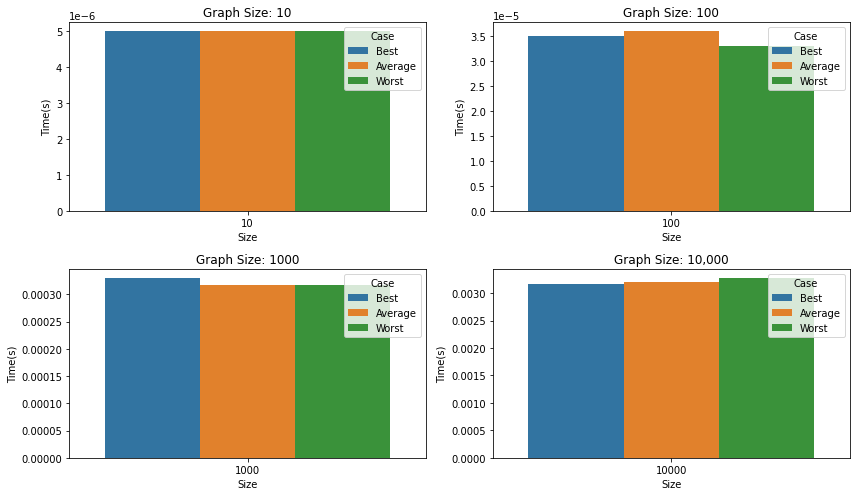

In [43]:
x = [10, 10, 10, 100, 100, 100, 1000, 1000, 1000, 10000, 10000, 10000]
y = [0.000005, 0.000005, 0.000005, 0.000035, 0.000036, 0.000033, 0.000330, 0.000318, 0.000318, 0.003167, 0.003206, 0.003276]
z = ['Best', 'Average', 'Worst','Best', 'Average', 'Worst','Best', 'Average', 'Worst','Best', 'Average', 'Worst']

results = pd.DataFrame({'Size': x, 'Time(s)': y, 'Case': z}, columns=['Size', 'Time(s)', 'Case'])
results_10 = results[results["Size"] == 10]
results_100 = results[results["Size"] == 100]
results_1k = results[results["Size"] == 1000]
results_10k = results[results["Size"] == 10000]
fig, axs = plt.subplots(2, 2, figsize=(12, 7))


axs[0, 0].set_title("Graph Size: 10")
axs[0, 1].set_title("Graph Size: 100")
axs[1, 0].set_title("Graph Size: 1000")
axs[1, 1].set_title("Graph Size: 10,000")


sb.barplot(data=results_10, y="Time(s)", x="Size", hue="Case", ax=axs[0, 0])
sb.barplot(data=results_100, y="Time(s)", x="Size", hue="Case", ax=axs[0, 1])
sb.barplot(data=results_1k, y="Time(s)", x="Size", hue="Case", ax=axs[1, 0])
sb.barplot(data=results_10k, y="Time(s)", x="Size", hue="Case", ax=axs[1, 1])

plt.tight_layout()